# Federal Funds Rate Analysis (1954-Present)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt

/kaggle/input/interest-rates/index.csv


## Introduction (Problem Statement)

The Federal Reserve uses interest rate policy as a primary tool to stabilize the U.S. economy. Changes in the federal funds rate are used to combat inflation, support employment, and respond to economic shocks.
This project analyzes how and when the Federal Reserve changes interest rates, focusing on identifying tightening and easing cycles from 1954 to the present and examining how these changes relate to unemployment and inflation.

Key questions:

1. How have federal funds rate changes evolved over time?

2. When does the Fed enter tightening versus easing cycles?

3. How do rate changes relate to unemployment and inflation?

In [2]:
# Open a CSV file and read it into a DataFrame
df = pd.read_csv("/kaggle/input/interest-rates/index.csv")

# Displays the first few rows of the DataFrame
df.head()


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


There is no single date column include in the dataframe. Which is common for economic datasets.

To analyze time series data properly, we need to combine Year, Month, Day into one Date Column 

# Create a Date Column and Set the Date as the Index

In [3]:
# Create a Date column
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]]) # combines Year + Month + Day into one real date

# Set the Date as the index (time-series rule)
df = df.set_index("Date")

### Why we do this 

Combines Year + Month + Day into one real date and allows:

    - Time Series plots
    - Rolling averages
    - Filtering by date ranges

## Create a Table with Variables Being Used

In [4]:
# Keep only what you need 
rate_df = df[["Effective Federal Funds Rate"]].copy()

# Basic Summary Statistics

In [5]:
# Basic Summary
round((rate_df.describe()), 2)

,Effective Federal Funds Rate
count,752.00
mean,4.91
std,3.61
min,0.07
25%,2.43
50%,4.70
75%,6.58
max,19.10


### Interpretation 

These summary statistics demonstrate that U.S. monetary policy has historically operated across a wide range of interest rate levels. While recent experience has been dominated by unusually low rates, the long-run average and distribution show that higher rates have been common historically. This reinforces the importance of analyzing rate changes and policy cycles, rather than focusing solely on recent conditions.

# Visual 1: Effective Federal Funds Rate (Levels) Over Time

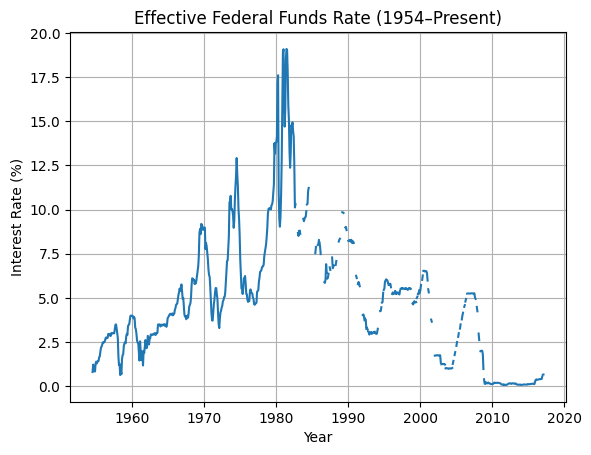

In [6]:
# Add gridlines for Readability
plt.figure()
plt.plot(rate_df.index, rate_df["Effective Federal Funds Rate"])
plt.title("Effective Federal Funds Rate (1954–Present)")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")

# To add grid lines to chart
plt.grid(True)

plt.show()


### Interpretation

This visualization shows the long-run behavior of the federal funds rate and highlights distinct monetary policy regimes over time. Periods of sustained high rates reflect inflation-control efforts, while prolonged low-rate environments correspond to economic downturns and crisis responses. While informative for historical context, this graph does not capture the timing or intensity of policy actions.

## Calculate the Rate of Change Over Time

In [7]:
# Calculate the Rate Change
df["Rate Change"] = df["Effective Federal Funds Rate"].diff() # .diff takes the current value and subtracts the previous value

# Convert to Basis Points
df["Rate Change (bps)"] = df["Rate Change"] * 100

## Visual 2: Rate Changes Over Time (Basis Points)

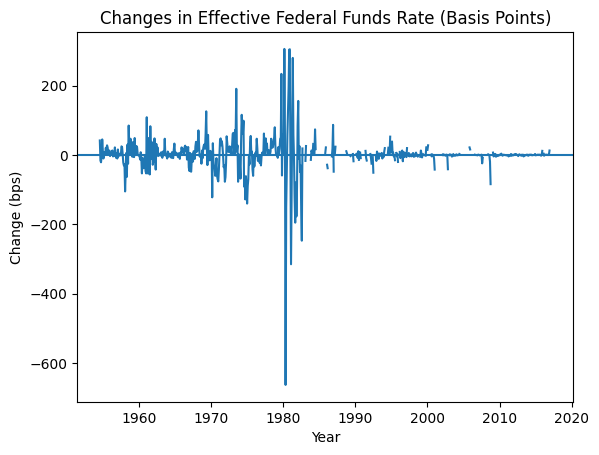

In [8]:
# Plot the rate changes 
plt.figure()
plt.plot(df.index, df["Rate Change (bps)"])
plt.axhline(0)  # zero line (no change)
plt.title("Changes in Effective Federal Funds Rate (Basis Points)")
plt.xlabel("Year")
plt.ylabel("Change (bps)")
plt.show()

### Interpretation 

This graph isolates Federal Reserve policy actions by displaying month-to-month rate changes. Most observations cluster near zero, indicating infrequent adjustments, while sharp positive and negative spikes mark periods of aggressive tightening or easing. This highlights the event-driven nature of monetary policy..

## Visual 3: Rolling Average of Rate Changes (Smooth Volatility)

In [9]:
# Create Rolling Average column
df["Rolling Avg Change (12M, bps)"] = (
    df["Rate Change (bps)"]
    .rolling(window=12)
    .mean()
)

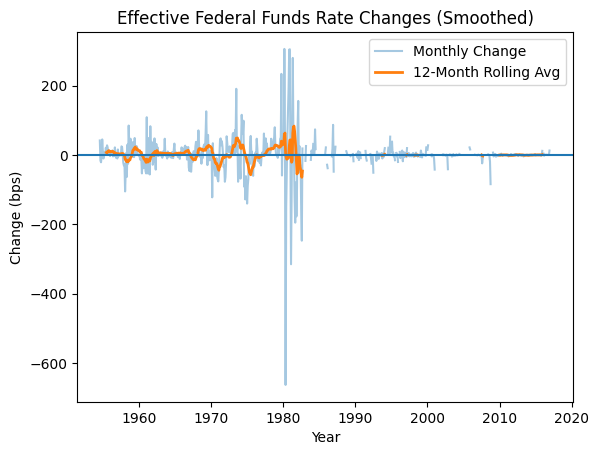

In [10]:
# Plot raw changes vs smoothed changes
plt.figure()
plt.plot(df.index, df["Rate Change (bps)"], alpha=0.4, label="Monthly Change")
plt.plot(df.index, df["Rolling Avg Change (12M, bps)"], linewidth=2, label="12-Month Rolling Avg")
plt.axhline(0)
plt.title("Effective Federal Funds Rate Changes (Smoothed)")
plt.xlabel("Year")
plt.ylabel("Change (bps)")
plt.legend() # labels each line when plotting multiple series 
plt.show()

### Interpretation 

The rolling average smooths short-term volatility and reveals sustained monetary policy direction. Persistent positive values indicate tightening cycles, while persistent negative values indicate easing cycles. This visualization clearly distinguishes temporary fluctuations from longer-term policy regimes.

# Rate Hikes and Cuts

In [11]:
# Find the largest rate hikes
largest_hikes = df["Rate Change (bps)"].nlargest(10)
largest_hikes


Date
1980-03-01    306.0
1980-12-01    305.0
1980-11-01    304.0
1981-05-01    280.0
1979-10-01    234.0
1980-10-01    194.0
1973-07-01    191.0
1982-02-01    156.0
1969-05-01    126.0
1980-09-01    126.0
Name: Rate Change (bps), dtype: float64

In [12]:
#Find the largest rate cuts
largest_cuts = df["Rate Change (bps)"].nsmallest(10)
largest_cuts

Date
1980-05-01   -663.0
1981-02-01   -315.0
1982-08-01   -247.0
1981-09-01   -195.0
1981-11-01   -177.0
1982-07-01   -156.0
1980-06-01   -151.0
1975-01-01   -140.0
1974-10-01   -128.0
1981-03-01   -123.0
Name: Rate Change (bps), dtype: float64

## Visual 4: Largest Rate Hikes and Cuts Highlighted

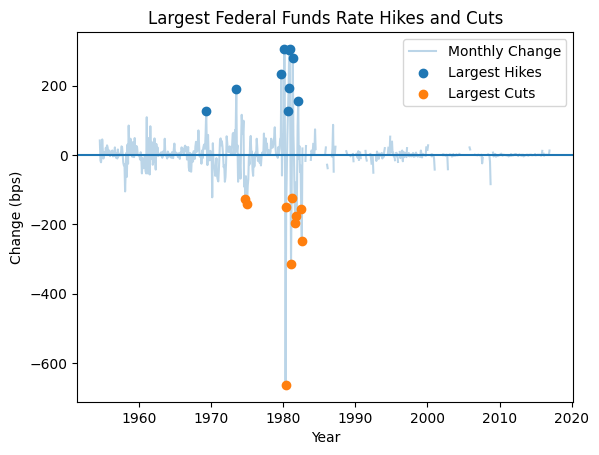

In [13]:
plt.figure()

# Plot all changes lightly
plt.plot(df.index, df["Rate Change (bps)"], alpha=0.3, label="Monthly Change")

# Highlight largest hikes
plt.scatter(
    largest_hikes.index,
    largest_hikes.values,
    label="Largest Hikes",
    zorder=3 #forces appearance on top of line 
)

# Highlight largest cuts
plt.scatter(
    largest_cuts.index,
    largest_cuts.values,
    label="Largest Cuts",
    zorder=3
)

plt.axhline(0)
plt.title("Largest Federal Funds Rate Hikes and Cuts")
plt.xlabel("Year")
plt.ylabel("Change (bps)")
plt.legend()
plt.show()


### Interpretation 

Highlighting the largest rate changes identifies months when the Federal Reserve acted most aggressively. Extreme cuts cluster around economic crises, while extreme hikes align with inflation-fighting periods. These events disproportionately shape the overall monetary policy narrative.

# Compare Rate Changes to Unemployment/Inflation

In [14]:
compare_df = df[[
    "Rate Change (bps)", "Unemployment Rate", "Inflation Rate"]
].copy()

compare_df = compare_df.dropna()

compare_df

,Rate Change (bps),Unemployment Rate,Inflation Rate
Date,,,
1958-01-01,-26.0,5.8,3.2
1958-02-01,-105.0,6.4,3.2
1958-03-01,-47.0,6.7,2.8
1958-04-01,6.0,7.4,2.4
1958-05-01,-63.0,7.4,2.4
...,...,...,...
2016-09-01,0.0,4.9,2.2
2016-10-01,0.0,4.8,2.1
2016-11-01,1.0,4.6,2.1


## Visual 5: Rate Changes vs Unemployment 

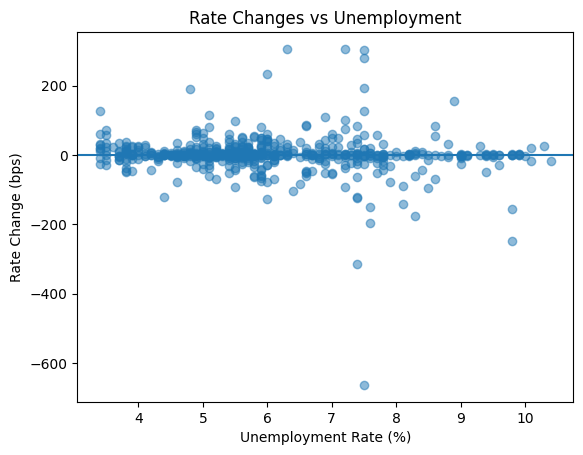

In [15]:
plt.figure()
plt.scatter(
    compare_df["Unemployment Rate"],
    compare_df["Rate Change (bps)"],
    alpha=0.5
)
plt.axhline(0)
plt.title("Rate Changes vs Unemployment")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Rate Change (bps)")
plt.show()

### Interpretation

This scatter plot shows that large negative rate changes occur more frequently when unemployment is high. Although the relationship is noisy, the pattern supports counter-cyclical policy behavior, with the Fed easing policy during periods of labor market weakness.

## Visual 6: Rate Change Vs Inflation 

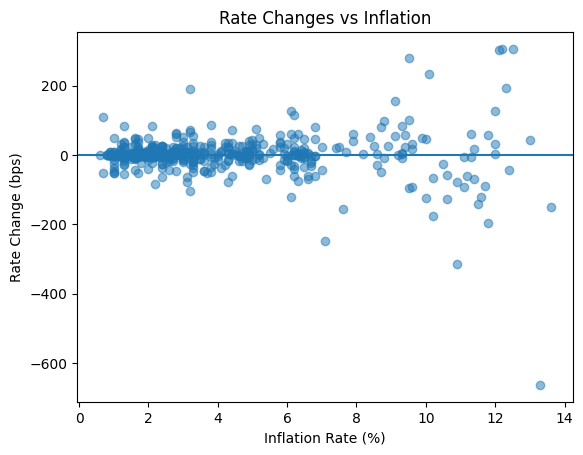

In [16]:
plt.figure()
plt.scatter(
    compare_df["Inflation Rate"],
    compare_df["Rate Change (bps)"],
    alpha=0.5
)
plt.axhline(0)
plt.title("Rate Changes vs Inflation")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Rate Change (bps)")
plt.show()

### Interpretation

Positive rate changes are more common at higher inflation levels, indicating tightening in response to price pressures. While not perfectly linear, the pattern is consistent with the Federal Reserve’s price-stability mandate.

# Identify Tightening vs Easing Cycles

In [17]:
# Decide the rule 

df["Rolling Avg Change (12M, bps)"]

# Create the Cycle Label Column
def label_cycle(x):
    if x > 5: 
        return "Tightening"
    elif x < 5:
        return "Easing"
    else: 
        return "Neutral"

df["Policy Cycle"] = df["Rolling Avg Change (12M, bps)"].apply(label_cycle)

# Sanity Check 
df[["Rolling Avg Change (12M, bps)", "Policy Cycle"]].head(20)

,"Rolling Avg Change (12M, bps)",Policy Cycle
Date,,
1954-07-01,NaN,Neutral
1954-08-01,NaN,Neutral
1954-09-01,NaN,Neutral
1954-10-01,NaN,Neutral
1954-11-01,NaN,Neutral
1954-12-01,NaN,Neutral
1955-01-01,NaN,Neutral
1955-02-01,NaN,Neutral
1955-03-01,NaN,Neutral


## How Often was the Fed Tightening vs Easing?

In [18]:
df["Policy Cycle"].value_counts()

Policy Cycle
Neutral       489
Easing        264
Tightening    151
Name: count, dtype: int64

### Interpretation 

The results indicate that the Federal Reserve spends the majority of time in a neutral policy stance, with fewer periods of active easing or tightening. This suggests that monetary policy adjustments are not continuous; instead, the Fed typically maintains existing policy settings unless economic conditions warrant intervention.

Among active policy regimes, easing occurs more frequently than tightening. This asymmetry reflects the Federal Reserve’s tendency to respond aggressively to economic downturns, financial crises, and rising unemployment by lowering interest rates. In contrast, tightening cycles are less frequent and often occur over shorter durations, typically in response to sustained inflationary pressures.

## Visualize Cycles of the Rate-Change Plot

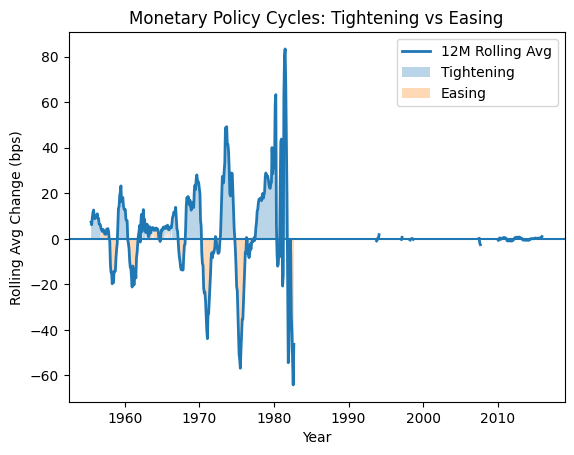

In [19]:
plt.figure()

# Plot rolling average
plt.plot(
    df.index,
    df["Rolling Avg Change (12M, bps)"],
    label="12M Rolling Avg",
    linewidth=2
)

# Shade tightening periods
plt.fill_between(
    df.index,
    df["Rolling Avg Change (12M, bps)"],
    where=df["Policy Cycle"] == "Tightening",
    alpha=0.3,
    interpolate=True,
    label="Tightening"
)

# Shade easing periods
plt.fill_between(
    df.index,
    df["Rolling Avg Change (12M, bps)"],
    where=df["Policy Cycle"] == "Easing",
    alpha=0.3,
    interpolate=True,
    label="Easing"
)

plt.axhline(0)
plt.title("Monetary Policy Cycles: Tightening vs Easing")
plt.xlabel("Year")
plt.ylabel("Rolling Avg Change (bps)")
plt.legend()
plt.show()

### Interpretation 

This visualization automatically classifies monetary policy regimes using the rolling average of rate changes. The results reveal distinct tightening and easing cycles that align with known historical events, improving interpretability and reducing subjective judgment.

## Key Takeaways

This project shows that U.S. monetary policy follows clear, condition-driven patterns rather than random adjustments. Interest rate levels provide historical context, while rate changes reveal when and how aggressively the Federal Reserve intervenes.

Easing cycles occur more frequently than tightening cycles and tend to align with periods of economic stress and elevated unemployment. Tightening cycles are less common and are primarily associated with inflationary pressures. Overall, the analysis highlights the counter-cyclical and asymmetric nature of Federal Reserve policy.
